In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/SalesPrediction.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [75]:
df.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [76]:
df.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [77]:
df = pd.get_dummies(df)
df

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,False,True,False,False
1,13.0,9.237765,2.409567,46.677897,False,True,False,False
2,41.0,15.886446,2.913410,150.177829,False,True,False,False
3,83.0,30.020028,6.922304,298.246340,False,True,False,False
4,15.0,8.437408,1.405998,56.594181,False,False,True,False
...,...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,False,False,True,False
4568,71.0,20.610685,6.545573,249.101915,False,False,False,True
4569,44.0,19.800072,5.096192,163.631457,False,False,True,False
4570,71.0,17.534640,1.940873,253.610411,True,False,False,False


In [78]:
new_df = df.fillna(0)

In [79]:
new_df.isnull().sum()

TV                  0
Radio               0
Social Media        0
Sales               0
Influencer_Macro    0
Influencer_Mega     0
Influencer_Micro    0
Influencer_Nano     0
dtype: int64

In [80]:
df.mean()

TV                   54.066857
Radio                18.160356
Social Media          3.323956
Sales               192.466602
Influencer_Macro      0.245407
Influencer_Mega       0.253281
Influencer_Micro      0.252187
Influencer_Nano       0.249125
dtype: float64

In [81]:
new_df = df.fillna(df.mean())

In [82]:
new_df
df = new_df

In [83]:
df.corr()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
TV,1.000000,0.866885,0.527010,0.996652,0.021335,-0.012630,-0.004863,-0.003645
Radio,0.866885,1.000000,0.606793,0.867369,0.009518,-0.005071,0.004212,-0.008601
Social Media,0.527010,0.606793,1.000000,0.528121,0.011631,0.013072,-0.013312,-0.011351
Sales,0.996652,0.867369,0.528121,1.000000,0.019267,-0.011701,-0.004099,-0.003289
Influencer_Macro,0.021335,0.009518,0.011631,0.019267,1.000000,-0.332131,-0.331171,-0.328482
Influencer_Mega,-0.012630,-0.005071,0.013072,-0.011701,-0.332131,1.000000,-0.338211,-0.335465
Influencer_Micro,-0.004863,0.004212,-0.013312,-0.004099,-0.331171,-0.338211,1.000000,-0.334495
Influencer_Nano,-0.003645,-0.008601,-0.011351,-0.003289,-0.328482,-0.335465,-0.334495,1.000000


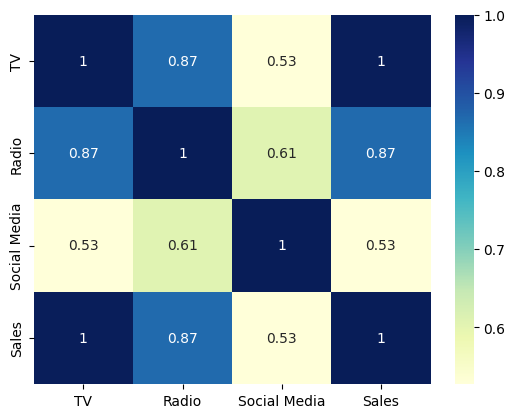

In [84]:
new_df = df[['TV', 'Radio', 'Social Media', 'Sales']]
sns.heatmap(new_df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.show()

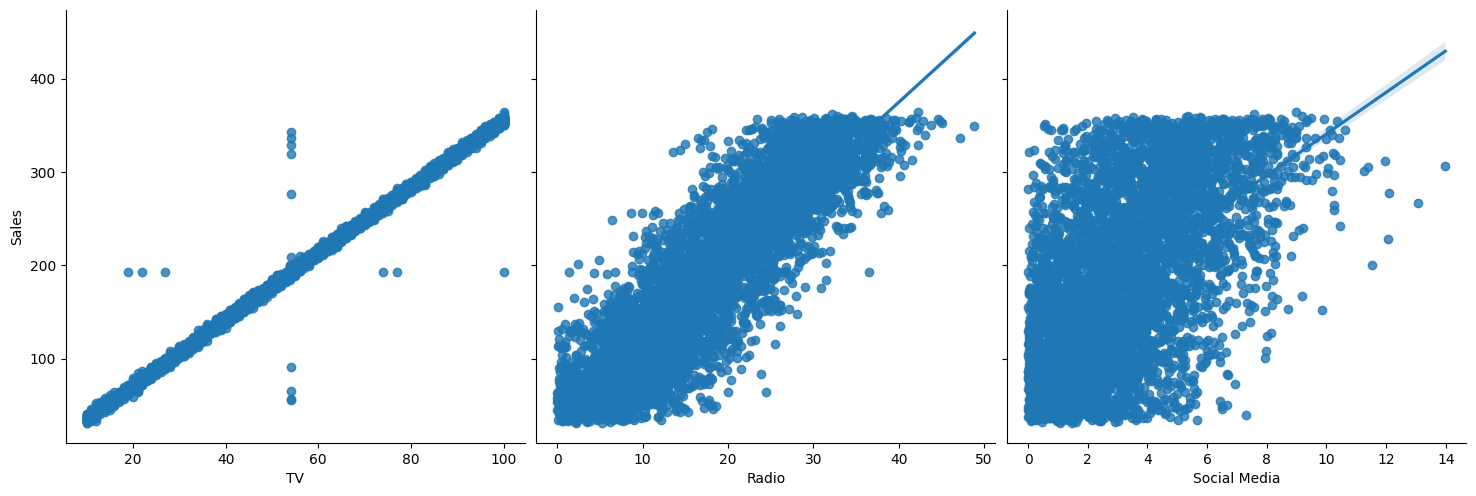

In [26]:
sns.pairplot(new_df, x_vars=['TV', 'Radio', 'Social Media'], y_vars=['Sales'], height=5, kind='reg')
plt.show()

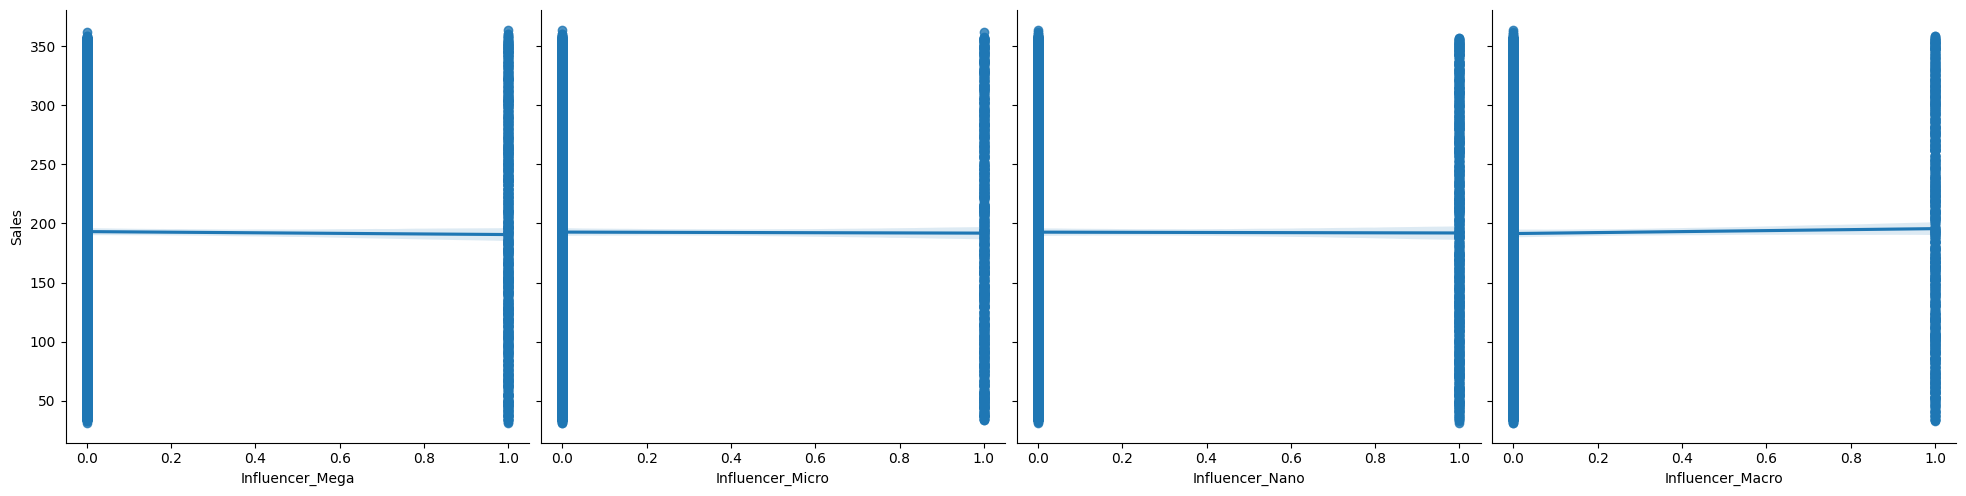

In [28]:
sns.pairplot(df, x_vars=['Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano', 'Influencer_Macro'], y_vars=['Sales'], height=5, kind='reg')
plt.show()

In [29]:
df.columns

Index(['TV', 'Radio', 'Social Media', 'Sales', 'Influencer_Macro',
       'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano'],
      dtype='object')

In [85]:
X = df[['TV', 'Radio', 'Social Media', 'Influencer_Macro', 'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano']]
y = df['Sales']
y

0        54.732757
1        46.677897
2       150.177829
3       298.246340
4        56.594181
           ...    
4567     94.685866
4568    249.101915
4569    163.631457
4570    253.610411
4571    148.202414
Name: Sales, Length: 4572, dtype: float64

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3063, 7), (1509, 7), (3063,), (1509,))

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)

In [90]:
scaler.mean_, scaler.scale_

(array([53.85123548, 18.12585565,  3.32579422,  0.24779628,  0.25138753,
         0.25301992,  0.24779628]),
 array([26.09129252,  9.69876729,  2.19978175,  0.43173288,  0.43381083,
         0.43474227,  0.43173288]))

In [91]:
X_train_processed

array([[ 0.42729828,  0.61404135,  1.54021996, ..., -0.57948652,
         1.71821363, -0.57395739],
       [-1.52737682, -1.23295628, -1.10187815, ..., -0.57948652,
        -0.58199981,  1.74228962],
       [-1.60403075, -1.61799956, -0.38508333, ..., -0.57948652,
         1.71821363, -0.57395739],
       ...,
       [-0.4158949 , -0.44140702,  0.80301603, ...,  1.72566569,
        -0.58199981, -0.57395739],
       [ 1.34714539,  0.37533335, -0.51488099, ..., -0.57948652,
         1.71821363, -0.57395739],
       [-0.53087579, -0.6411086 , -0.62176988, ..., -0.57948652,
        -0.58199981,  1.74228962]], shape=(3063, 7))

In [92]:
X_test_processed = scaler.transform(X_test)
X_test_processed

array([[-1.25908808, -1.70893294, -1.42160761, ..., -0.57948652,
        -0.58199981,  1.74228962],
       [-1.14410719, -1.12385993, -0.90555577, ..., -0.57948652,
        -0.58199981, -0.57395739],
       [ 1.07885665,  1.71588143,  0.41924641, ..., -0.57948652,
         1.71821363, -0.57395739],
       ...,
       [ 1.00220273,  0.68216385, -0.84366308, ...,  1.72566569,
        -0.58199981, -0.57395739],
       [ 0.00570169,  0.29833031,  0.51502837, ..., -0.57948652,
        -0.58199981, -0.57395739],
       [-1.10578023,  0.35527656, -1.42886907, ..., -0.57948652,
         1.71821363, -0.57395739]], shape=(1509, 7))

In [128]:
from sklearn.metrics import r2_score

In [144]:
class CustomLinearRegression:
  def __init__(self, X_data, y_target, learning_rate=0.1, num_epochs=10000):
    self.num_samples = X_data.shape[0]
    self.X_data = np.c_[np.ones((self.num_samples, 1)), X_data]
    self.y_target = y_target
    self.learning_rate = learning_rate
    self.num_epochs = num_epochs
    self.num_features = X_data.shape[1]

  # Initial weights
    self.theta = np.random.randn(self.X_data.shape[1], 1)
    self.losses = []

  def compute_loss(self, y_pred, y_target):
    loss = (y_pred - y_target) ** 2
    loss = np.mean(loss)
    return loss

  def predict(self, X_data):
    if (X_data.shape[1] != self.num_features):
      y_pred = X_data.dot(self.theta)
    else:
      X_data = np.c_[np.ones((X_data.shape[0], 1)), X_data]
      y_pred = X_data.dot(self.theta)
    return y_pred

  def fit(self):
    for epoch in range(self.num_epochs):
      # predict
      y_pred = self.predict(self.X_data)
      # compute loss
      loss = self.compute_loss(y_pred, self.y_target)
      self.losses.append(loss)
      # compute gradient
      loss_grd = 2 * (y_pred - self.y_target)/self.num_samples
      gradients = self.X_data.T.dot(loss_grd)
      # update weights
      self.theta = self.theta - (self.learning_rate * gradients)
      if (epoch % 50) == 0:
        print(f'Epoch : {epoch} - Loss : {loss}')
    return {
      'loss': sum(self.losses)/len(self.losses),
      'weight': self.theta
    }

In [145]:
linear_model = CustomLinearRegression(X_train_processed, y_train, learning_rate=0.1, num_epochs=10000)
linear_model.fit()

Epoch : 0 - Loss : 45016.11805696134
Epoch : 50 - Loss : 88.22908142302138
Epoch : 100 - Loss : 58.21779936105171
Epoch : 150 - Loss : 56.00393114388873
Epoch : 200 - Loss : 55.84055047465246
Epoch : 250 - Loss : 55.82849318735329
Epoch : 300 - Loss : 55.82760337475981
Epoch : 350 - Loss : 55.82753770771284
Epoch : 400 - Loss : 55.827532861567605
Epoch : 450 - Loss : 55.82753250392818
Epoch : 500 - Loss : 55.82753247753485
Epoch : 550 - Loss : 55.827532475587056
Epoch : 600 - Loss : 55.827532475443334
Epoch : 650 - Loss : 55.82753247543271
Epoch : 700 - Loss : 55.82753247543193
Epoch : 750 - Loss : 55.82753247543187
Epoch : 800 - Loss : 55.827532475431894
Epoch : 850 - Loss : 55.827532475431866
Epoch : 900 - Loss : 55.82753247543187
Epoch : 950 - Loss : 55.827532475431866
Epoch : 1000 - Loss : 55.82753247543187
Epoch : 1050 - Loss : 55.82753247543185
Epoch : 1100 - Loss : 55.82753247543185
Epoch : 1150 - Loss : 55.82753247543187
Epoch : 1200 - Loss : 55.82753247543185
Epoch : 1250 - Lo

{'loss': np.float64(68.33371404355871),
 'weight': array([[ 1.91695036e+02],
        [ 9.15895887e+01],
        [ 1.22910609e+00],
        [ 1.26290392e-01],
        [-2.97820437e-01],
        [-7.97645489e-02],
        [-1.56557344e-01],
        [-1.33787783e-01]])}

In [146]:
preds = linear_model.predict(X_test_processed)
preds[:5]
y_test[:5]

4165     70.554559
2458     81.653904
2833    292.177417
3096    269.390206
563     253.938774
Name: Sales, dtype: float64

In [147]:
r2_score(y_test, preds)

0.9929967461773731

LINEAR REGRESSION

In [155]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_processed, y_train)
preds = linear_model.predict(X_test_processed)
preds[:5]
y_test[:5]
r2_score(y_test, preds)

0.9929967461773731

NONLINEAR (POLYNOMIAL) REGRESSION

In [156]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_processed) 
X_test_poly = poly_features.transform(X_test_processed)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
preds = poly_model.predict(X_test_poly)
preds[:5]
y_test[:5]
r2_score(y_test, preds)

0.9929224151097563

In [165]:
linear_model.predict(X_test_processed)[1:5]

array([[ 85.10626006],
       [292.69396812],
       [270.70777194],
       [249.51683191]])